In [257]:
import requests
from bs4 import BeautifulSoup
import time
import urllib.request 
from selenium.webdriver import Chrome
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException,ElementClickInterceptedException 
import datetime as dt
from urllib.request import urlopen
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud 
%matplotlib inline 
from collections import Counter
import matplotlib.pyplot as plt
plt.rc('font',family = 'Malgun Gothic')
plt.rc('axes',unicode_minus = False)

delay = 2.0
browser = Chrome()

start_url = 'https://www.yogiyo.co.kr/mobile/#/'
browser.get(start_url)
browser.maximize_window()

In [6]:
browser.find_element_by_xpath('/html/body/div[7]/div/div[2]/a').click()
browser.find_element_by_xpath('/html/body/div[6]/div/div[1]/div[1]/div/div/button').click()
browser.find_element_by_xpath('/html/body/div[6]/div/div[1]/div[1]/div/div/div/ul/li[15]/form/div/input').click()

In [10]:
browser.find_element_by_xpath('/html/body/div[6]/div/div[1]/div[1]/div/div/div/ul/li[15]/form/div/input').send_keys('열혈분식')

In [11]:
browser.find_element_by_xpath('/html/body/div[6]/div/div[1]/div[1]/div/div/div/ul/li[15]/form/div/input').send_keys(Keys.RETURN)

In [13]:
browser.find_element_by_css_selector('#content > div > div:nth-child(5) > div > div > div > div').click()

In [14]:
browser.find_element_by_xpath('/html/body/div[6]/div[2]/div[1]/ul/li[2]/a').click()

In [70]:
menu_list = []
content_list = []
score_list = []
for i in range(2,1393) :
    if i >=10 and i % 10 == 2:
        browser.find_element_by_xpath('/html/body/div[6]/div[2]/div[1]/div[5]/ul/li[{}]/a/span'.format(i)).click()
        time.sleep(1.5)
        
    score_list.append(round(np.mean(list(map(int,re.findall("\d+",browser.find_element_by_xpath('/html/body/div[6]/div[2]/div[1]/div[5]/ul/li[{}]/div[2]/div/span[2]'.format(i)).text))))))
    time.sleep(1)
    
    menu_list.append(browser.find_element_by_css_selector('#review > li:nth-child({}) > div.order-items.default.ng-binding'.format(i)).text)
    time.sleep(1)
    
    content_list.append(browser.find_element_by_css_selector('#review > li:nth-child({}) > p'.format(i)).text)
    time.sleep(1)

In [77]:
yogiyo_df = pd.DataFrame(score_list,columns=['리뷰점수'])

In [78]:
yogiyo_df['리뷰'] = content_list
yogiyo_df['메뉴'] = menu_list

In [106]:
yogiyo_df.insert(0,'label',[1 if score>=4 else 0 for score in yogiyo_df['리뷰점수']])

In [108]:
yogiyo_df.to_csv("열혈분식.csv",index=False)

In [5]:
yogiyo = pd.read_csv('열혈분식.csv')

<AxesSubplot:>

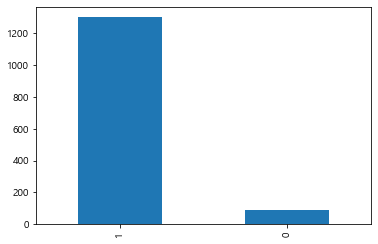

In [6]:
yogiyo['label'].value_counts().plot.bar()

- imbalanced data

In [39]:
from kiwipiepy import Kiwi, Option

In [367]:
yogiyo

,label,리뷰점수,리뷰,메뉴
0,1,5.0,너무맛있어요 담에도먹을개요,"참치김밥/1,고구마튀김（2P）/1,제육덮밥/1"
1,1,5.0,고기짬뽕은언제나맛있습니다,"수제고기짬뽕/1,신김치두루치기/1"
2,1,5.0,항상 맛있게 먹어요 근데 오늘은 김밥 밥이 좀 아쉬웠어요,"열혈김밥/2,찰보리 쫄볶이/1,제육덮밥/1"
3,1,5.0,너무낫있어요,"길어묵（4P）/1,수제치킨까스/1,열혈쫄면/1,캔커피/1"
4,0,2.0,쫄면 별로특히 제육덮밥은 고기냄새나고ㅜ,"열혈쫄면/1,제육덮밥/1"
...,...,...,...,...
1386,0,3.0,맛과 양은 괜찮은데 배달시간이 너무 아쉽네요 분 걸린다고 해서 기다렸는데 분 넘게 ...,"열혈김밥/1,대패삼겹 '쌈김밥'/1,김말이（2p）/1,찰보리 라볶이/1"
1387,1,5.0,맛있어요,"열혈김밥/1,참치김밥/1,직화 제육덮밥/1"
1388,0,3.0,포장이나 배달등이 좀 잘 됫음 좋을것 같아염,"열혈김밥/2,수제고기짬뽕/1"
1389,1,5.0,별 기대없이 시켯는데 괜찬네요,"참치김밥/2,열혈쫄면/1,직화 제육덮밥/1"


In [17]:
yogiyo['리뷰'] = yogiyo['리뷰'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [37]:
stopwords = pd.read_csv('한국어불용어.csv')

In [40]:
kiwi = Kiwi()
kiwi.prepare()

0

In [50]:
result = kiwi.analyze(yogiyo['리뷰'][0])

In [98]:
def extract_keywords(text):
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos[0] in 'NV':
            yield f'{token}'

In [61]:
positive_df = yogiyo.loc[yogiyo['label']==1].reset_index(drop = True)
negative_df = yogiyo.loc[yogiyo['label']==0].reset_index(drop = True)

In [ ]:
positive_df = positive_df.loc[(positive_df['리뷰']!= ' ')& (positive_df['리뷰']  != '')& (positive_df['리뷰']  != '  ')].reset_index(drop = True)

In [ ]:
kiwi_list = [list(extract_keywords(positive_df['리뷰'][i])) for i in range(len(positive_df))]

In [186]:
positive_df['토큰'] = kiwi_list

In [243]:
positive_df['토큰'] = positive_df['토큰'].apply(lambda x : [item for item in x if item not in stopwords['불용어'].tolist()])

In [256]:
positive_words = []
for i in range(len(positive_df)) :
    for value in positive_df['토큰'][i] :
        positive_words.append(value)

In [260]:
positive_word_count = Counter(positive_words)

In [486]:
print(positive_word_count.most_common(20))

[('맛있', 831), ('먹', 604), ('맛', 252), ('배달', 226), ('김밥', 192), ('양', 139), ('빠르', 135), ('쫄면', 95), ('주문', 95), ('떡볶이', 86), ('거', 85), ('돈까스', 60), ('김치', 59), ('튀김', 53), ('밥', 52), ('제육', 50), ('굿', 50), ('괜찮', 49), ('분식', 47), ('맛나', 43)]


In [502]:
positive_df = pd.DataFrame(positive_word_count.most_common())
positive_df.columns = ['형태소','빈도수']
positive_dict = positive_df.set_index("형태소").to_dict()
positive_df = positive_df.sort_values(by='빈도수',ascending = False)
positive_dict = positive_df.set_index('형태소')['빈도수'].to_dict()

In [524]:
positive_df.to_csv("긍정.csv",index = False)

In [517]:
from wordcloud import WordCloud

wc = WordCloud(
    font_path = 'Malgun Gothic',    
    background_color='white',                             
    colormap = 'Spectral',                                
    width = 400,
    height = 300
)

In [ ]:
negative_df = negative_df.loc[(negative_df['리뷰']!= ' ')& (negative_df['리뷰']  != '')& (negative_df['리뷰']  != '  ')].reset_index(drop = True)

In [ ]:
nkiwi_list = [list(extract_keywords(negative_df['리뷰'][i])) for i in range(len(negative_df))]

In [187]:
negative_df['토큰'] = nkiwi_list

In [244]:
negative_df['토큰'] = negative_df['토큰'].apply(lambda x : [item for item in x if item not in stopwords['불용어'].tolist()])

In [255]:
negative_words = []
for i in range(len(negative_df)) :
    for value in negative_df['토큰'][i] :
        negative_words.append(value)

In [259]:
negative_word_count = Counter(negative_words)

In [519]:
negative_data = pd.DataFrame(negative_word_count.most_common())
negative_data.columns = ['형태소','빈도수']
negative_data = negative_data.sort_values(by='빈도수',ascending = False)
negative_dict = negative_data.set_index('형태소')['빈도수'].to_dict()

In [522]:
negative_data.to_csv("부정.csv",index = False)

In [264]:
from sklearn.feature_extraction.text import CountVectorizer

In [265]:
vector = CountVectorizer(max_features=2000)

In [271]:
total_df = pd.concat([positive_df,negative_df],axis = 0).reset_index(drop = True)

In [282]:
total_df['corpus'] = [' ' .join(total_df['토큰'][i]) for i in range(len(total_df))]

In [470]:
tdm = vector.fit_transform(total_df['corpus']).toarray()

In [297]:
from sklearn.model_selection import train_test_split

In [317]:
train = pd.DataFrame(tdm)
y = total_df[['label']]

In [318]:
smote = SMOTE(random_state=42)
train_over, y_over = smote.fit_sample(train,y)

In [320]:
train_over.shape

(2556, 1135)

<AxesSubplot:xlabel='label'>

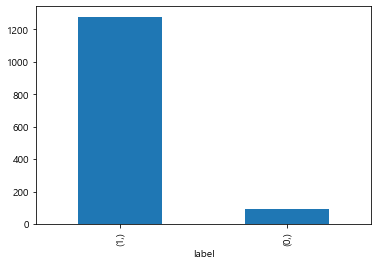

In [327]:
pd.DataFrame(y).value_counts().plot.bar()

<AxesSubplot:xlabel='label'>

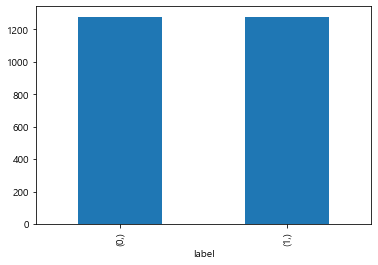

In [328]:
pd.DataFrame(y_over).value_counts().plot.bar()

In [333]:
total_over = pd.concat([train_over,y_over],axis = 1)

In [336]:
X_train,X_test,y_train,y_test = train_test_split(total_over.iloc[:,:-1],total_over[['label']],test_size = 0.3,random_state = 42)

In [338]:
print(X_train.shape)
print(X_test.shape)

(1789, 1135)
(767, 1135)


In [339]:
import tensorflow as tf

In [343]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [340]:
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Dense(
        1, 
        input_shape=(1135,), 
        activation='sigmoid',
        kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [344]:
history = model.fit(X_train, y_train.values, epochs=300, batch_size=100, validation_split=0.1,
          callbacks=[tf.keras.callbacks.EarlyStopping()])

Epoch 1/300
17/17 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8789 - val_loss: 0.3899 - val_accuracy: 0.8436
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8783 - val_loss: 0.3896 - val_accuracy: 0.8492
Epoch 3/300
17/17 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8783 - val_loss: 0.3895 - val_accuracy: 0.8492
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8783 - val_loss: 0.3893 - val_accuracy: 0.8492
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8783 - val_loss: 0.3890 - val_accuracy: 0.8492
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8783 - val_loss: 0.3888 - val_accuracy: 0.8492
Epoch 7/300
17/17 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8783 - val_loss: 0.3885 - val_accuracy: 0.8492
Epoch 8/300
1

In [ ]:
def extract_keywords(text):
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos[0] in 'NV':
            yield f'{token}'

In [480]:
def review_auto() :
    
    new_review = (input('리뷰를 남겨주세요: '))
    new_sentence = list(extract_keywords(new_review))
    new_sentence = [word for word in new_sentence if not word in stopwords['불용어'].tolist()]
    new_sentence = ' '.join(new_sentence)
        
    vector = CountVectorizer(max_features=1135)
    tdm = vector.fit_transform(total_df['corpus']).toarray()
    array_value = vector.transform([new_sentence]).toarray()
    x = model.predict(array_value)
    print(x[0][0])
    
    if x>0.7:
        
        print('안녕하세요. 배달의 민주입니다. 맛있게 드셨다니 정말 다행입니다:) 다음에도 꼭 주문해주세요! ')            
    else:
        print('고객님 안녕하세요, 불편을 끼쳐드려 진심으로 죄송합니다. 앞으로 더욱 노력하는 배달의 민주 되겠습니다.')  
    

In [481]:
review_auto()

리뷰를 남겨주세요: 김밥이 맛있고 사장님이 친절해요
0.92384684
안녕하세요. 배달의 민주입니다. 맛있게 드셨다니 정말 다행입니다:) 다음에도 꼭 주문해주세요! 


In [482]:
review_auto()

리뷰를 남겨주세요: 맛이 별로에요 쫄면이 다 불어서 왔어요
0.25309855
고객님 안녕하세요, 불편을 끼쳐드려 진심으로 죄송합니다. 앞으로 더욱 노력하는 배달의 민주 되겠습니다.
